<a href="https://colab.research.google.com/github/raregem-AI/Machine-Learning-Projects/blob/main/Emergency_Bed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# Load dataset
train = pd.read_csv("/content/drive/MyDrive/simulated_emergency_data.csv")
df_desc = pd.read_csv('/content/drive/MyDrive/simulated_emergency_metadata.txt', delimiter = "\t")

In [ ]:
df_desc

,Metadata: simulated_emergency_data.csv / simulated_emergency_data.json
0,Description:
1,This dataset simulates real-time hospital bed ...
2,Dataset Summary:
3,- Number of Observations (Rows): 1000
4,- Number of Variables (Columns): 20
5,Variable Descriptions:
6,1. patient_id - Unique identifie...
7,2. age - Age of the patie...
8,3. gender - Patient’s gender...
9,4. triage_level - Urgency of care ...


In [ ]:
#read the first  five rows
train.head()

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay
0,P0001,48,Female,3,Sepsis,BED5,Room B 4,occupied,2025-06-01 8:32:00,2025-06-01 9:13:00,2025-06-01 10:22:00,2025-06-01 9:13:00,16,6,14,transferred,admission,system,69,41,1,119
1,P0002,68,Female,1,Cardiac,BED37,Room B 10,occupied,2025-06-01 15:11:00,2025-06-01 15:28:00,2025-06-01 16:04:00,2025-06-01 15:28:00,17,8,5,transferred,admission,manual,36,17,0,52
2,P0003,31,Female,5,Respiratory,BED22,Room A 5,vacant,2025-06-01 10:08:00,2025-06-01 10:23:00,2025-06-01 12:57:00,2025-06-01 10:23:00,11,3,10,discharged,discharge,manual,154,15,1,102
3,P0004,84,Male,3,Cardiac,BED4,Room B 2,occupied,2025-06-01 14:08:00,2025-06-01 14:18:00,2025-06-01 15:01:00,2025-06-01 14:18:00,7,3,6,admitted,discharge,sensor,43,10,1,138
4,P0005,59,Female,3,Respiratory,BED32,Room B 6,vacant,2025-06-01 15:45:00,2025-06-01 15:52:00,2025-06-01 17:49:00,2025-06-01 15:52:00,16,10,7,transferred,cleaning,system,117,7,0,53


In [ ]:
# read the last five rows
train.tail()

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay
995,P0996,81,Male,1,Sepsis,BED38,Room A 10,occupied,2025-06-01 12:35:00,2025-06-01 13:24:00,2025-06-01 15:09:00,2025-06-01 13:24:00,7,2,11,discharged,admission,system,105,49,1,186
996,P0997,50,Male,3,Cardiac,BED41,Room B 4,occupied,2025-06-01 16:47:00,2025-06-01 17:46:00,2025-06-01 18:34:00,2025-06-01 17:46:00,9,8,7,admitted,cleaning,sensor,48,59,0,34
997,P0998,41,Female,5,Respiratory,BED1,Room B 6,occupied,2025-06-01 8:37:00,2025-06-01 8:38:00,2025-06-01 11:08:00,2025-06-01 8:38:00,20,2,4,transferred,admission,sensor,150,1,1,144
998,P0999,26,Female,3,Cardiac,BED8,Room C 9,vacant,2025-06-01 8:19:00,2025-06-01 8:44:00,2025-06-01 10:40:00,2025-06-01 10:40:00,9,2,18,discharged,cleaning,sensor,116,25,1,104
999,P1000,48,Male,1,Cardiac,BED19,Room A 8,occupied,2025-06-01 19:40:00,2025-06-01 20:03:00,2025-06-01 21:19:00,2025-06-01 21:19:00,16,8,0,transferred,discharge,manual,76,23,0,126


In [ ]:
# data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   patient_id                      1000 non-null   object
 1   age                             1000 non-null   int64 
 2   gender                          1000 non-null   object
 3   triage_level                    1000 non-null   int64 
 4   diagnosis_category              1000 non-null   object
 5   bed_id                          1000 non-null   object
 6   room_id                         1000 non-null   object
 7   bed_status                      1000 non-null   object
 8   visit_time                      1000 non-null   object
 9   entry_time                      1000 non-null   object
 10  exit_time                       1000 non-null   object
 11  timestamp                       1000 non-null   object
 12  staff_on_duty                   1000 non-null   i

In [ ]:
#Check for missing values
train.isnull().sum()

,0
patient_id,0
age,0
gender,0
triage_level,0
diagnosis_category,0
bed_id,0
room_id,0
bed_status,0
visit_time,0
entry_time,0


In [ ]:
train['visit_time'] = pd.to_datetime(train['visit_time'])
train['entry_time'] = pd.to_datetime(train['entry_time'])
train['exit_time'] = pd.to_datetime(train['exit_time'])
train['timestamp'] = pd.to_datetime(train['timestamp'])


In [ ]:
#summarry statistics
train.describe()

,age,triage_level,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.683000,3.180000,2025-06-01 13:53:26.819999744,2025-06-01 14:23:46.440000,2025-06-01 16:06:59.220000,2025-06-01 14:56:22.500000256,12.332000,5.111000,10.153000,103.213000,30.327000,0.492000,134.069000
min,18.000000,1.000000,2025-06-01 08:02:00,2025-06-01 08:07:00,2025-06-01 08:50:00,2025-06-01 08:07:00,5.000000,0.000000,0.000000,30.000000,0.000000,0.000000,30.000000
25%,35.750000,2.000000,2025-06-01 10:51:45,2025-06-01 11:16:30,2025-06-01 13:02:15,2025-06-01 11:52:00,8.000000,2.000000,5.000000,67.000000,14.750000,0.000000,83.000000
50%,53.000000,3.000000,2025-06-01 13:54:30,2025-06-01 14:18:00,2025-06-01 15:59:30,2025-06-01 15:00:30,12.000000,5.000000,10.000000,103.000000,31.000000,0.000000,132.000000
75%,71.000000,4.000000,2025-06-01 16:54:15,2025-06-01 17:28:30,2025-06-01 19:01:15,2025-06-01 17:57:15,17.000000,8.000000,15.000000,137.000000,45.250000,1.000000,184.000000
max,90.000000,5.000000,2025-06-01 20:00:00,2025-06-01 20:56:00,2025-06-01 23:26:00,2025-06-01 23:26:00,20.000000,10.000000,20.000000,180.000000,60.000000,1.000000,240.000000
std,20.893038,1.259836,NaN,NaN,NaN,NaN,4.684199,3.168709,6.122179,42.799807,17.914938,0.500186,59.662835


## Feature Engineering

In [ ]:
# Extract hours and minutes
train['visit_hour'] = train['visit_time'].dt.hour
train['visit_minute'] = train['visit_time'].dt.minute

In [ ]:
train['entry_hour'] = train['entry_time'].dt.hour
train['entry_minute'] = train['entry_time'].dt.minute
train['exit_hour'] = train['exit_time'].dt.hour
train['exit_minute'] = train['exit_time'].dt.minute
train['time_stamp_hour'] = train['timestamp'].dt.hour
train['time_stamp_minute'] = train['timestamp'].dt.minute


In [ ]:
train.head(20)

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay,visit_hour,visit_minute,entry_hour,entry_minute,exit_hour,exit_minute,time_stamp_hour,time_stamp_minute
0,P0001,48,Female,3,Sepsis,BED5,Room B 4,occupied,2025-06-01 08:32:00,2025-06-01 09:13:00,2025-06-01 10:22:00,2025-06-01 09:13:00,16,6,14,transferred,admission,system,69,41,1,119,8,32,9,13,10,22,9,13
1,P0002,68,Female,1,Cardiac,BED37,Room B 10,occupied,2025-06-01 15:11:00,2025-06-01 15:28:00,2025-06-01 16:04:00,2025-06-01 15:28:00,17,8,5,transferred,admission,manual,36,17,0,52,15,11,15,28,16,4,15,28
2,P0003,31,Female,5,Respiratory,BED22,Room A 5,vacant,2025-06-01 10:08:00,2025-06-01 10:23:00,2025-06-01 12:57:00,2025-06-01 10:23:00,11,3,10,discharged,discharge,manual,154,15,1,102,10,8,10,23,12,57,10,23
3,P0004,84,Male,3,Cardiac,BED4,Room B 2,occupied,2025-06-01 14:08:00,2025-06-01 14:18:00,2025-06-01 15:01:00,2025-06-01 14:18:00,7,3,6,admitted,discharge,sensor,43,10,1,138,14,8,14,18,15,1,14,18
4,P0005,59,Female,3,Respiratory,BED32,Room B 6,vacant,2025-06-01 15:45:00,2025-06-01 15:52:00,2025-06-01 17:49:00,2025-06-01 15:52:00,16,10,7,transferred,cleaning,system,117,7,0,53,15,45,15,52,17,49,15,52
5,P0006,67,Male,3,Injury,BED15,Room A 6,occupied,2025-06-01 14:13:00,2025-06-01 15:05:00,2025-06-01 17:46:00,2025-06-01 15:05:00,7,10,8,admitted,cleaning,manual,161,52,1,165,14,13,15,5,17,46,15,5
6,P0007,60,Male,4,Sepsis,BED3,Room A 6,cleaning,2025-06-01 17:03:00,2025-06-01 17:41:00,2025-06-01 18:56:00,2025-06-01 18:56:00,7,5,16,admitted,cleaning,manual,75,38,0,151,17,3,17,41,18,56,18,56
7,P0008,31,Female,5,Cardiac,BED47,Room A 9,cleaning,2025-06-01 14:02:00,2025-06-01 14:22:00,2025-06-01 16:44:00,2025-06-01 16:44:00,18,7,19,discharged,cleaning,manual,142,20,0,219,14,2,14,22,16,44,16,44
8,P0009,42,Male,3,Sepsis,BED39,Room B 2,occupied,2025-06-01 14:36:00,2025-06-01 15:33:00,2025-06-01 16:51:00,2025-06-01 15:33:00,9,4,18,transferred,discharge,system,78,57,0,55,14,36,15,33,16,51,15,33
9,P0010,86,Male,3,Respiratory,BED15,Room B 10,occupied,2025-06-01 11:59:00,2025-06-01 12:01:00,2025-06-01 14:59:00,2025-06-01 14:59:00,9,5,11,transferred,discharge,sensor,178,2,0,184,11,59,12,1,14,59,14,59


In [ ]:
train_same_hour = train.where(train['visit_hour']==train['exit_hour']).dropna(how='all')
train_same_hour

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay,visit_hour,visit_minute,entry_hour,entry_minute,exit_hour,exit_minute,time_stamp_hour,time_stamp_minute
107,P0108,71.0,Female,1.0,Respiratory,BED28,Room A 5,vacant,2025-06-01 18:02:00,2025-06-01 18:27:00,2025-06-01 18:57:00,2025-06-01 18:27:00,5.0,9.0,7.0,transferred,admission,system,30.0,25.0,0.0,219.0,18.0,2.0,18.0,27.0,18.0,57.0,18.0,27.0
185,P0186,22.0,Female,4.0,Cardiac,BED25,Room C 8,cleaning,2025-06-01 09:08:00,2025-06-01 09:18:00,2025-06-01 09:48:00,2025-06-01 09:48:00,8.0,0.0,7.0,discharged,admission,sensor,30.0,10.0,0.0,104.0,9.0,8.0,9.0,18.0,9.0,48.0,9.0,48.0
254,P0255,37.0,Male,3.0,Other,BED1,Room C 6,occupied,2025-06-01 19:04:00,2025-06-01 19:21:00,2025-06-01 19:55:00,2025-06-01 19:55:00,6.0,5.0,0.0,admitted,admission,manual,34.0,17.0,0.0,91.0,19.0,4.0,19.0,21.0,19.0,55.0,19.0,55.0
356,P0357,74.0,Male,3.0,Respiratory,BED27,Room C 3,occupied,2025-06-01 17:13:00,2025-06-01 17:27:00,2025-06-01 17:57:00,2025-06-01 17:27:00,5.0,10.0,9.0,transferred,discharge,manual,30.0,14.0,1.0,54.0,17.0,13.0,17.0,27.0,17.0,57.0,17.0,27.0
357,P0358,88.0,Female,2.0,Injury,BED9,Room C 3,vacant,2025-06-01 08:02:00,2025-06-01 08:18:00,2025-06-01 08:50:00,2025-06-01 08:18:00,9.0,2.0,18.0,admitted,discharge,manual,32.0,16.0,0.0,236.0,8.0,2.0,8.0,18.0,8.0,50.0,8.0,18.0
417,P0418,34.0,Female,3.0,Sepsis,BED10,Room B 2,vacant,2025-06-01 18:00:00,2025-06-01 18:02:00,2025-06-01 18:52:00,2025-06-01 18:02:00,7.0,10.0,15.0,admitted,discharge,sensor,50.0,2.0,1.0,47.0,18.0,0.0,18.0,2.0,18.0,52.0,18.0,2.0
547,P0548,90.0,Female,3.0,Other,BED41,Room B 4,occupied,2025-06-01 16:05:00,2025-06-01 16:18:00,2025-06-01 16:57:00,2025-06-01 16:57:00,18.0,3.0,1.0,transferred,cleaning,sensor,39.0,13.0,0.0,84.0,16.0,5.0,16.0,18.0,16.0,57.0,16.0,57.0
662,P0663,26.0,Male,3.0,Cardiac,BED40,Room A 5,occupied,2025-06-01 16:19:00,2025-06-01 16:20:00,2025-06-01 16:58:00,2025-06-01 16:20:00,16.0,2.0,16.0,transferred,discharge,manual,38.0,1.0,0.0,102.0,16.0,19.0,16.0,20.0,16.0,58.0,16.0,20.0


In [ ]:
train_same_minute = train.where(train['visit_minute']==train['exit_minute']).dropna(how='all')
train_same_minute

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay,visit_hour,visit_minute,entry_hour,entry_minute,exit_hour,exit_minute,time_stamp_hour,time_stamp_minute
9,P0010,86.0,Male,3.0,Respiratory,BED15,Room B 10,occupied,2025-06-01 11:59:00,2025-06-01 12:01:00,2025-06-01 14:59:00,2025-06-01 14:59:00,9.0,5.0,11.0,transferred,discharge,sensor,178.0,2.0,0.0,184.0,11.0,59.0,12.0,1.0,14.0,59.0,14.0,59.0
10,P0011,74.0,Female,4.0,Respiratory,BED25,Room C 9,occupied,2025-06-01 12:46:00,2025-06-01 13:32:00,2025-06-01 14:46:00,2025-06-01 13:32:00,18.0,8.0,17.0,transferred,discharge,sensor,74.0,46.0,0.0,237.0,12.0,46.0,13.0,32.0,14.0,46.0,13.0,32.0
17,P0018,53.0,Male,4.0,Cardiac,BED22,Room C 7,occupied,2025-06-01 12:32:00,2025-06-01 13:20:00,2025-06-01 14:32:00,2025-06-01 13:20:00,13.0,1.0,16.0,admitted,discharge,manual,72.0,48.0,0.0,119.0,12.0,32.0,13.0,20.0,14.0,32.0,13.0,20.0
37,P0038,42.0,Male,2.0,Cardiac,BED16,Room A 6,cleaning,2025-06-01 08:09:00,2025-06-01 08:27:00,2025-06-01 09:09:00,2025-06-01 08:27:00,8.0,1.0,16.0,discharged,discharge,manual,42.0,18.0,1.0,239.0,8.0,9.0,8.0,27.0,9.0,9.0,8.0,27.0
54,P0055,69.0,Female,4.0,Sepsis,BED7,Room C 1,vacant,2025-06-01 09:53:00,2025-06-01 10:09:00,2025-06-01 12:53:00,2025-06-01 10:09:00,16.0,3.0,8.0,transferred,discharge,manual,164.0,16.0,1.0,187.0,9.0,53.0,10.0,9.0,12.0,53.0,10.0,9.0
153,P0154,42.0,Male,5.0,Injury,BED41,Room C 10,occupied,2025-06-01 12:01:00,2025-06-01 12:37:00,2025-06-01 14:01:00,2025-06-01 12:37:00,6.0,9.0,0.0,transferred,cleaning,system,84.0,36.0,0.0,132.0,12.0,1.0,12.0,37.0,14.0,1.0,12.0,37.0
193,P0194,23.0,Male,4.0,Sepsis,BED40,Room A 10,vacant,2025-06-01 13:56:00,2025-06-01 14:04:00,2025-06-01 15:56:00,2025-06-01 14:04:00,5.0,3.0,7.0,admitted,discharge,sensor,112.0,8.0,1.0,56.0,13.0,56.0,14.0,4.0,15.0,56.0,14.0,4.0
274,P0275,70.0,Female,2.0,Cardiac,BED18,Room A 6,occupied,2025-06-01 10:44:00,2025-06-01 10:45:00,2025-06-01 12:44:00,2025-06-01 10:45:00,5.0,2.0,3.0,admitted,discharge,system,119.0,1.0,0.0,170.0,10.0,44.0,10.0,45.0,12.0,44.0,10.0,45.0
373,P0374,79.0,Male,3.0,Other,BED29,Room A 4,occupied,2025-06-01 16:16:00,2025-06-01 16:22:00,2025-06-01 18:16:00,2025-06-01 18:16:00,17.0,4.0,1.0,admitted,cleaning,sensor,114.0,6.0,0.0,239.0,16.0,16.0,16.0,22.0,18.0,16.0,18.0,16.0
411,P0412,63.0,Male,4.0,Other,BED25,Room C 2,cleaning,2025-06-01 15:24:00,2025-06-01 15:30:00,2025-06-01 17:24:00,2025-06-01 17:24:00,19.0,8.0,2.0,admitted,discharge,sensor,114.0,6.0,1.0,227.0,15.0,24.0,15.0,30.0,17.0,24.0,17.0,24.0


In [ ]:
train.tail()

,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay,visit_hour,visit_minute,entry_hour,entry_minute,exit_hour,exit_minute,time_stamp_hour,time_stamp_minute
995,P0996,81,Male,1,Sepsis,BED38,Room A 10,occupied,2025-06-01 12:35:00,2025-06-01 13:24:00,2025-06-01 15:09:00,2025-06-01 13:24:00,7,2,11,discharged,admission,system,105,49,1,186,12,35,13,24,15,9,13,24
996,P0997,50,Male,3,Cardiac,BED41,Room B 4,occupied,2025-06-01 16:47:00,2025-06-01 17:46:00,2025-06-01 18:34:00,2025-06-01 17:46:00,9,8,7,admitted,cleaning,sensor,48,59,0,34,16,47,17,46,18,34,17,46
997,P0998,41,Female,5,Respiratory,BED1,Room B 6,occupied,2025-06-01 08:37:00,2025-06-01 08:38:00,2025-06-01 11:08:00,2025-06-01 08:38:00,20,2,4,transferred,admission,sensor,150,1,1,144,8,37,8,38,11,8,8,38
998,P0999,26,Female,3,Cardiac,BED8,Room C 9,vacant,2025-06-01 08:19:00,2025-06-01 08:44:00,2025-06-01 10:40:00,2025-06-01 10:40:00,9,2,18,discharged,cleaning,sensor,116,25,1,104,8,19,8,44,10,40,10,40
999,P1000,48,Male,1,Cardiac,BED19,Room A 8,occupied,2025-06-01 19:40:00,2025-06-01 20:03:00,2025-06-01 21:19:00,2025-06-01 21:19:00,16,8,0,transferred,discharge,manual,76,23,0,126,19,40,20,3,21,19,21,19


In [ ]:
# prompt: code where rows of visit_hour equal exit_hour

train_same_hour = train.where(train['visit_hour']==train['exit_hour']).dropna(how='all')
train_same_hour

In [ ]:

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

for col in categorical_cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

train.head()


,patient_id,age,gender,triage_level,diagnosis_category,bed_id,room_id,bed_status,visit_time,entry_time,exit_time,timestamp,staff_on_duty,critical_cases_in_queue,available_beds,discharge_status,event_type,update_source,length_of_stay,wait_time_before_bed,target_bed_available_next_hour,expected_length_of_stay,visit_hour,visit_minute,entry_hour,entry_minute,exit_hour,exit_minute,time_stamp_hour,time_stamp_minute
0,0,48,0,3,4,44,14,1,2025-06-01 08:32:00,2025-06-01 09:13:00,2025-06-01 10:22:00,2025-06-01 09:13:00,16,6,14,2,0,2,69,41,1,119,8,32,9,13,10,22,9,13
1,1,68,0,1,0,30,11,1,2025-06-01 15:11:00,2025-06-01 15:28:00,2025-06-01 16:04:00,2025-06-01 15:28:00,17,8,5,2,0,0,36,17,0,52,15,11,15,28,16,4,15,28
2,2,31,0,5,3,14,5,2,2025-06-01 10:08:00,2025-06-01 10:23:00,2025-06-01 12:57:00,2025-06-01 10:23:00,11,3,10,1,2,0,154,15,1,102,10,8,10,23,12,57,10,23
3,3,84,1,3,0,33,12,1,2025-06-01 14:08:00,2025-06-01 14:18:00,2025-06-01 15:01:00,2025-06-01 14:18:00,7,3,6,0,2,1,43,10,1,138,14,8,14,18,15,1,14,18
4,4,59,0,3,3,25,16,2,2025-06-01 15:45:00,2025-06-01 15:52:00,2025-06-01 17:49:00,2025-06-01 15:52:00,16,10,7,2,1,2,117,7,0,53,15,45,15,52,17,49,15,52


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   patient_id                      1000 non-null   int64         
 1   age                             1000 non-null   int64         
 2   gender                          1000 non-null   int64         
 3   triage_level                    1000 non-null   int64         
 4   diagnosis_category              1000 non-null   int64         
 5   bed_id                          1000 non-null   int64         
 6   room_id                         1000 non-null   int64         
 7   bed_status                      1000 non-null   int64         
 8   visit_time                      1000 non-null   datetime64[ns]
 9   entry_time                      1000 non-null   datetime64[ns]
 10  exit_time                       1000 non-null   datetime64[ns]
 11  times

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split



target_column = 'target_bed_available_next_hour' # Replace with your actual target column if you have one

if target_column in train.columns:
  X = train.drop(columns=[target_column,'patient_id','bed_id','room_id','visit_time','entry_time','exit_time','timestamp'])
  y = train[target_column]
else:
  X = train
  y = None
  print(f"Warning: Target column '{target_column}' not found. Splitting data without a target variable.")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of the original data:", train.shape)
print("Shape of the training features:", X_train.shape)
print("Shape of the testing features:", X_test.shape)
if y is not None:
  print("Shape of the training target:", y_train.shape)
  print("Shape of the testing target:", y_test.shape)

Shape of the original data: (1000, 30)
Shape of the training features: (700, 22)
Shape of the testing features: (300, 22)
Shape of the training target: (700,)
Shape of the testing target: (300,)


In [ ]:
X.columns

Index(['age', 'gender', 'triage_level', 'diagnosis_category', 'bed_status',
       'staff_on_duty', 'critical_cases_in_queue', 'available_beds',
       'discharge_status', 'event_type', 'update_source', 'length_of_stay',
       'wait_time_before_bed', 'expected_length_of_stay', 'visit_hour',
       'visit_minute', 'entry_hour', 'entry_minute', 'exit_hour',
       'exit_minute', 'time_stamp_hour', 'time_stamp_minute'],
      dtype='object')

In [ ]:
train['gender'].value_counts()

,count
gender,
1,514
0,486


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
  # CatBoost
  print("\nTraining CatBoost...")
  # CatBoost can handle categorical features directly if you pass their indices
  # However, since you already label encoded, we can use the numerical data
  catboost_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 to suppress output
  catboost_model.fit(X_train, y_train)
  catboost_pred = catboost_model.predict_proba(X_test)[:, 1]
  catboost_auc = roc_auc_score(y_test, catboost_pred)
  print(f"CatBoost AUC: {catboost_auc}")


Training CatBoost...
CatBoost AUC: 0.4587759455975821


In [ ]:
  # LightGBM
  print("\nTraining LightGBM...")
  lgb_model = lgb.LGBMClassifier(random_state=42)
  lgb_model.fit(X_train, y_train)
  lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
  lgb_auc = roc_auc_score(y_test, lgb_pred)
  print(f"LightGBM AUC: {lgb_auc}")


Training LightGBM...
[LightGBM] [Info] Number of positive: 341, number of negative: 359
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487143 -> initscore=-0.051440
[LightGBM] [Info] Start training from score -0.051440
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
 # XGBoost
print("Training XGBoost...")

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred)
print(f"XGBoost AUC: {xgb_auc}")

Training XGBoost...
XGBoost AUC: 0.4734432641450731


In [ ]:


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import numpy as np

# Ensure y is not None before proceeding with stratified cross-validation
if y is not None:
    # Initialize StratifiedKFold
    # You can adjust the number of splits (n_splits)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    catboost_aucs = []
    lgb_aucs = []
    xgb_aucs = []

    print("\nPerforming Stratified K-Fold Cross-Validation...")

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"\n--- Fold {fold+1} ---")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train and evaluate CatBoost
        print("Training CatBoost...")
        catboost_model = CatBoostClassifier(random_state=42, verbose=0)
        catboost_model.fit(X_train, y_train)
        catboost_pred = catboost_model.predict_proba(X_test)[:, 1]
        catboost_auc = roc_auc_score(y_test, catboost_pred)
        print(f"CatBoost AUC for Fold {fold+1}: {catboost_auc}")
        catboost_aucs.append(catboost_auc)

        # Train and evaluate LightGBM
        print("Training LightGBM...")
        lgb_model = lgb.LGBMClassifier(random_state=42)
        lgb_model.fit(X_train, y_train)
        lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
        lgb_auc = roc_auc_score(y_test, lgb_pred)
        print(f"LightGBM AUC for Fold {fold+1}: {lgb_auc}")
        lgb_aucs.append(lgb_auc)

        # Train and evaluate XGBoost
        print("Training XGBoost...")
        xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
        xgb_auc = roc_auc_score(y_test, xgb_pred)
        print(f"XGBoost AUC for Fold {fold+1}: {xgb_auc}")
        xgb_aucs.append(xgb_auc)

    print("\n--- Cross-Validation Results ---")
    print(f"Average CatBoost AUC: {np.mean(catboost_aucs):.4f} +/- {np.std(catboost_aucs):.4f}")
    print(f"Average LightGBM AUC: {np.mean(lgb_aucs):.4f} +/- {np.std(lgb_aucs):.4f}")
    print(f"Average XGBoost AUC: {np.mean(xgb_aucs):.4f} +/- {np.std(xgb_aucs):.4f}")

else:
    print("Cannot perform stratified cross-validation as the target variable was not found.")


Performing Stratified K-Fold Cross-Validation...

--- Fold 1 ---
Training CatBoost...
CatBoost AUC for Fold 1: 0.5872
Training LightGBM...
[LightGBM] [Info] Number of positive: 442, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491111 -> initscore=-0.035559
[LightGBM] [Info] Start training from score -0.035559
LightGBM AUC for Fold 1: 0.6364
Training XGBoost...
XGBoost AUC for Fold 1: 0.5948

--- Fold 2 ---
Training CatBoost...
CatBoost AUC for Fold 2: 0.43599999999999994
Training LightGBM...
[LightGBM] [Info] Number of positive: 442, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `for

In [ ]:

  # Random Forest
  print("\nTraining Random Forest...")
  rf_model = RandomForestClassifier(random_state=42)
  rf_model.fit(X_train, y_train)
  rf_pred = rf_model.predict_proba(X_test)[:, 1]
  rf_auc = roc_auc_score(y_test, rf_pred)
  print(f"Random Forest AUC: {rf_auc}")


Training Random Forest...
Random Forest AUC: 0.461442730788035


In [ ]:


import numpy as np
# Time-Based Cross-Validation with Expanding Windows

# Sort data by the time column if available.
# Assuming 'timestamp' is the relevant time column for splitting.
# If not, replace 'timestamp' with the correct time column.
train = train.sort_values(by='timestamp').reset_index(drop=True)

# Define the number of splits for the time-based cross-validation
n_time_splits = 10  # You can adjust this number

print(f"\nPerforming Time-Based Cross-Validation with Expanding Windows ({n_time_splits} splits)...")

catboost_time_aucs = []
lgb_time_aucs = []
xgb_time_aucs = []

training data.

fold_size = len(train) // n_time_splits

for fold in range(n_time_splits):
    print(f"\n--- Time-Based Fold {fold+1} ---")

    # Define split points based on the time-sorted index
    train_end_index = (fold + 1) * fold_size
    test_start_index = train_end_index
    test_end_index = min(test_start_index + fold_size, len(train))

    # Ensure there is data for both training and testing in the fold
    if train_end_index <= 0 or test_start_index >= len(train) or test_start_index == test_end_index:
        print(f"Skipping Fold {fold+1}: Insufficient data for splitting.")
        continue

    # Get the indices for the training and testing sets
    train_index = train.index[:train_end_index]
    test_index = train.index[test_start_index:test_end_index]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train data size: {len(X_train)}, Test data size: {len(X_test)}")

    if len(y_test) == 0:
        print(f"Skipping Fold {fold+1}: No data in the test set.")
        continue

    # Train and evaluate CatBoost
    print("Training CatBoost...")
    catboost_model = CatBoostClassifier(random_state=42, verbose=0)
    catboost_model.fit(X_train, y_train)
    catboost_pred = catboost_model.predict_proba(X_test)[:, 1]
    catboost_auc = roc_auc_score(y_test, catboost_pred)
    print(f"CatBoost AUC for Time Fold {fold+1}: {catboost_auc}")
    catboost_time_aucs.append(catboost_auc)

    # Train and evaluate LightGBM
    print("Training LightGBM...")
    lgb_model = lgb.LGBMClassifier(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
    lgb_auc = roc_auc_score(y_test, lgb_pred)
    print(f"LightGBM AUC for Time Fold {fold+1}: {lgb_auc}")
    lgb_time_aucs.append(lgb_auc)

    # Train and evaluate XGBoost
    print("Training XGBoost...")
    xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
    xgb_auc = roc_auc_score(y_test, xgb_pred)
    print(f"XGBoost AUC for Time Fold {fold+1}: {xgb_auc}")
    xgb_time_aucs.append(xgb_auc)


print("\n--- Time-Based Cross-Validation Results (Expanding Windows) ---")
if catboost_time_aucs:
    print(f"Average CatBoost AUC: {np.mean(catboost_time_aucs):.4f} +/- {np.std(catboost_time_aucs):.4f}")
if lgb_time_aucs:
    print(f"Average LightGBM AUC: {np.mean(lgb_time_aucs):.4f} +/- {np.std(lgb_time_aucs):.4f}")
if xgb_time_aucs:
    print(f"Average XGBoost AUC: {np.mean(xgb_time_aucs):.4f} +/- {np.std(xgb_time_aucs):.4f}")


Performing Time-Based Cross-Validation with Expanding Windows (10 splits)...

--- Time-Based Fold 1 ---
Train data size: 100, Test data size: 100
Training CatBoost...
CatBoost AUC for Time Fold 1: 0.5963541666666667
Training LightGBM...
[LightGBM] [Info] Number of positive: 52, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g


Calculating SHAP values for catboost...


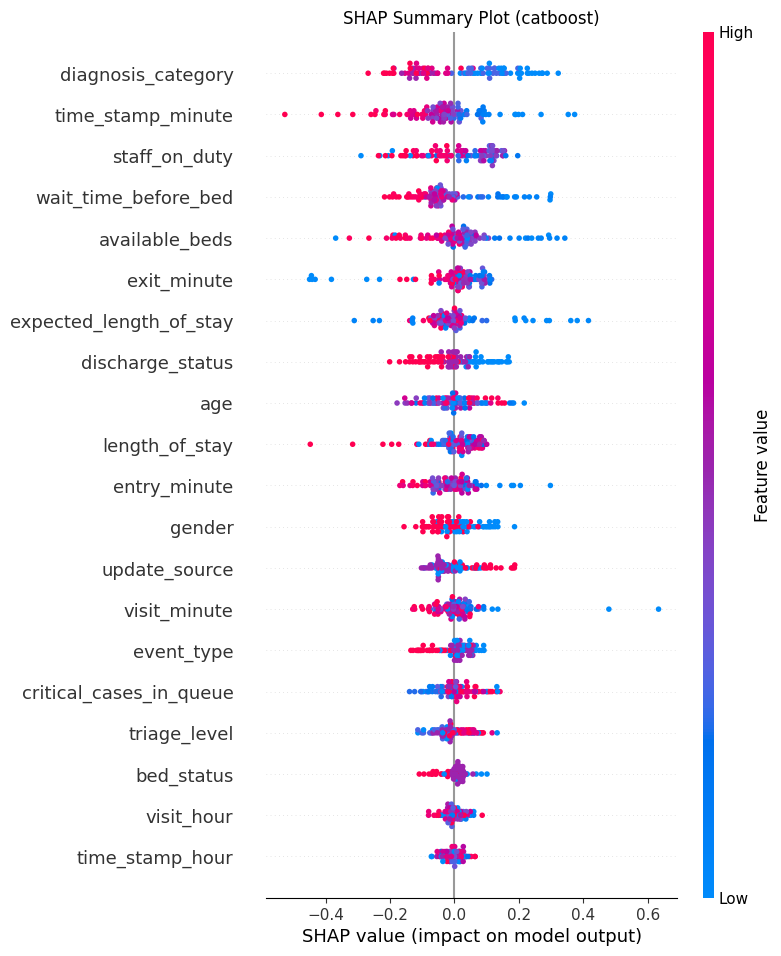

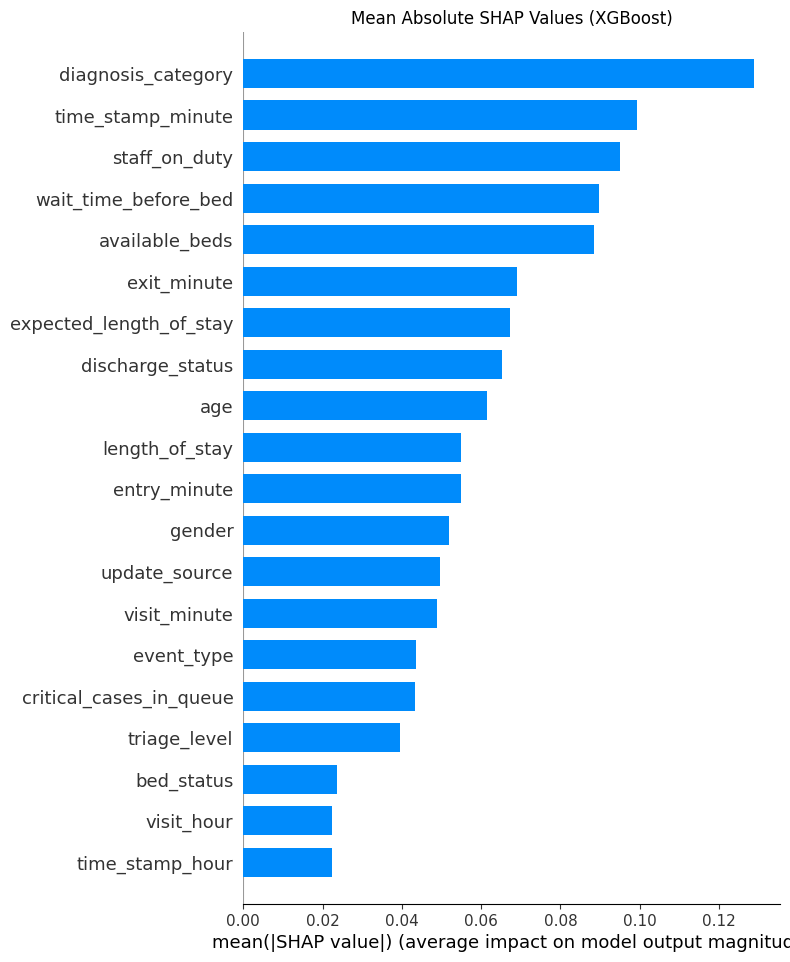

In [ ]:


  # SHAP for Feature Importance (using XGBoost as an example)
  print("\nCalculating SHAP values for catboost...")
  explainer = shap.TreeExplainer(catboost_model)
  shap_values = explainer.shap_values(X_test)

  # Plot summary plot of SHAP values
  shap.summary_plot(shap_values, X_test, show=False)
  plt.title("SHAP Summary Plot (catboost)")
  plt.show()

  # Plot bar plot of mean absolute SHAP values
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
  plt.title("Mean Absolute SHAP Values (XGBoost)")
  plt.show()




# Train Time Split


Performing Time-Based Cross-Validation with Expanding Windows (10 splits)...

--- Time-Based Fold 1 ---
Train data size: 100, Test data size: 100
Training CatBoost...
CatBoost AUC for Time Fold 1: 0.5963541666666667
Training LightGBM...
[LightGBM] [Info] Number of positive: 52, number of negative: 48
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

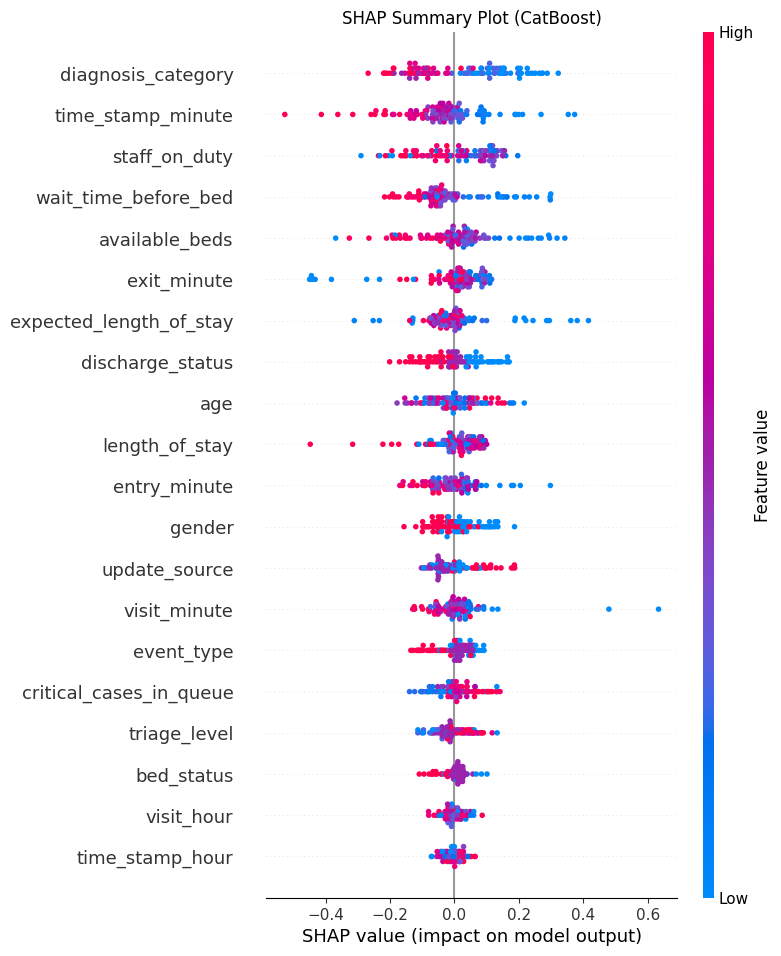

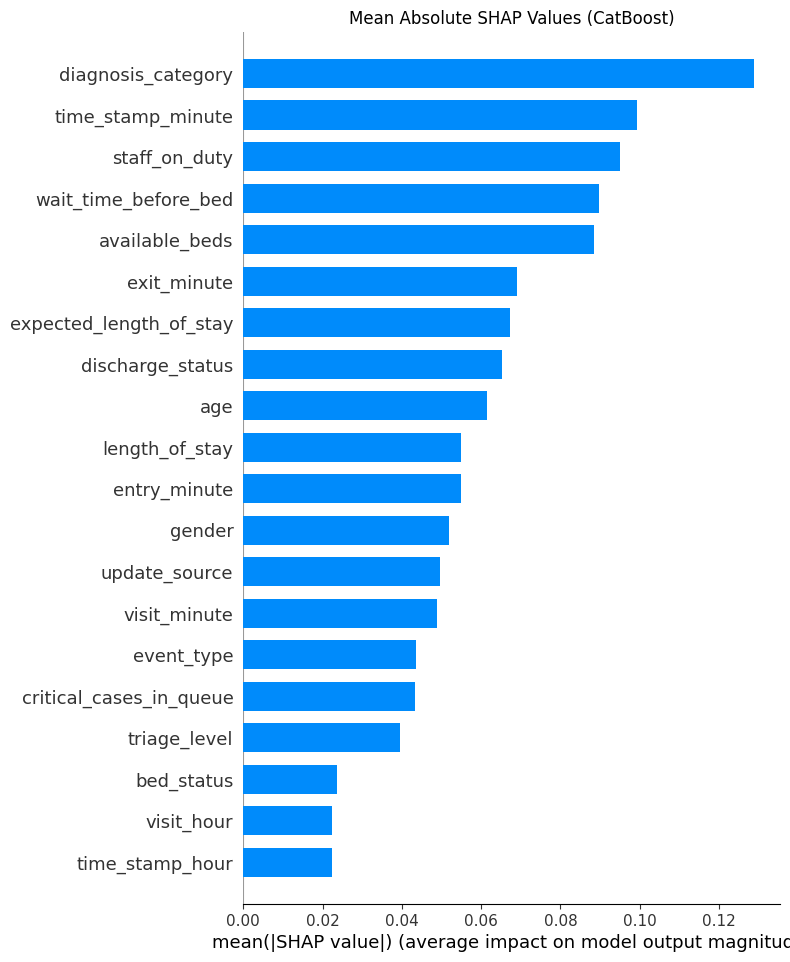

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install shap
import shap

# Ensure y is not None before proceeding with time-based cross-validation
if y is not None:
    # Define the number of splits for the time-based cross-validation
    n_time_splits = 10  # You can adjust this number

    print(f"\nPerforming Time-Based Cross-Validation with Expanding Windows ({n_time_splits} splits)...")

    catboost_time_aucs = []
    lgb_time_aucs = []
    xgb_time_aucs = []
    rf_time_aucs = []  # List to store Random Forest AUCs
    logreg_time_aucs = [] # List to store Logistic Regression AUCs

    fold_size = len(train) // n_time_splits

    for fold in range(n_time_splits):
        print(f"\n--- Time-Based Fold {fold+1} ---")

        # Define split points based on the time-sorted index
        train_end_index = (fold + 1) * fold_size
        test_start_index = train_end_index
        test_end_index = min(test_start_index + fold_size, len(train))

        # Ensure there is data for both training and testing in the fold
        if train_end_index <= 0 or test_start_index >= len(train) or test_start_index == test_end_index:
            print(f"Skipping Fold {fold+1}: Insufficient data for splitting.")
            continue

        # Get the indices for the training and testing sets
        train_index = train.index[:train_end_index]
        test_index = train.index[test_start_index:test_end_index]

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        print(f"Train data size: {len(X_train)}, Test data size: {len(X_test)}")

        if len(y_test) == 0:
            print(f"Skipping Fold {fold+1}: No data in the test set.")
            continue

        # Train and evaluate CatBoost
        print("Training CatBoost...")
        catboost_model = CatBoostClassifier(random_state=42, verbose=0)
        catboost_model.fit(X_train, y_train)
        catboost_pred = catboost_model.predict_proba(X_test)[:, 1]
        catboost_auc = roc_auc_score(y_test, catboost_pred)
        print(f"CatBoost AUC for Time Fold {fold+1}: {catboost_auc}")
        catboost_time_aucs.append(catboost_auc)

        # Train and evaluate LightGBM
        print("Training LightGBM...")
        lgb_model = lgb.LGBMClassifier(random_state=42)
        lgb_model.fit(X_train, y_train)
        lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
        lgb_auc = roc_auc_score(y_test, lgb_pred)
        print(f"LightGBM AUC for Time Fold {fold+1}: {lgb_auc}")
        lgb_time_aucs.append(lgb_auc)

        # Train and evaluate XGBoost
        print("Training XGBoost...")
        xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
        xgb_auc = roc_auc_score(y_test, xgb_pred)
        print(f"XGBoost AUC for Time Fold {fold+1}: {xgb_auc}")
        xgb_time_aucs.append(xgb_auc)

        # Train and evaluate Random Forest
        print("Training Random Forest...")
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict_proba(X_test)[:, 1]
        rf_auc = roc_auc_score(y_test, rf_pred)
        print(f"Random Forest AUC for Time Fold {fold+1}: {rf_auc}")
        rf_time_aucs.append(rf_auc)

        # Train and evaluate Logistic Regression
        print("Training Logistic Regression...")
        logreg_model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' for small datasets, consider 'lbfgs' for larger
        logreg_model.fit(X_train, y_train)
        logreg_pred = logreg_model.predict_proba(X_test)[:, 1]
        logreg_auc = roc_auc_score(y_test, logreg_pred)
        print(f"Logistic Regression AUC for Time Fold {fold+1}: {logreg_auc}")
        logreg_time_aucs.append(logreg_auc)


    print("\n--- Time-Based Cross-Validation Results (Expanding Windows) ---")
    if catboost_time_aucs:
        print(f"Average CatBoost AUC: {np.mean(catboost_time_aucs):.4f} +/- {np.std(catboost_time_aucs):.4f}")
    if lgb_time_aucs:
        print(f"Average LightGBM AUC: {np.mean(lgb_time_aucs):.4f} +/- {np.std(lgb_time_aucs):.4f}")
    if xgb_time_aucs:
        print(f"Average XGBoost AUC: {np.mean(xgb_time_aucs):.4f} +/- {np.std(xgb_time_aucs):.4f}")
    if rf_time_aucs:
        print(f"Average Random Forest AUC: {np.mean(rf_time_aucs):.4f} +/- {np.std(rf_time_aucs):.4f}")
    if logreg_time_aucs:
        print(f"Average Logistic Regression AUC: {np.mean(logreg_time_aucs):.4f} +/- {np.std(logreg_time_aucs):.4f}")


else:
    print("Cannot perform time-based cross-validation as the target variable was not found.")


# SHAP for Feature Importance (using CatBoost as an example)
if y is not None and len(X_test) > 0:
    print("\nCalculating SHAP values for CatBoost...")
    try:
        # SHAP can be sensitive to model types, TreeExplainer is for tree-based models
        explainer = shap.TreeExplainer(catboost_model)
        shap_values = explainer.shap_values(X_test)

        # If the target is binary, shap_values might be a list of arrays, one for each class.
        # We usually want the SHAP values for the positive class (index 1).
        if isinstance(shap_values, list):
             shap_values = shap_values[1]

        # Plot summary plot of SHAP values
        shap.summary_plot(shap_values, X_test, show=False)
        plt.title("SHAP Summary Plot (CatBoost)")
        plt.show()

        # Plot bar plot of mean absolute SHAP values
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title("Mean Absolute SHAP Values (CatBoost)")
        plt.show()

    except Exception as e:
        print(f"Error during SHAP calculation or plotting: {e}")
else:
    print("\nSkipping SHAP calculation: Target variable not found or test set is empty.")

# Model Ensemble

In [ ]:


import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# --- Stacking ---
# Stacking involves training several base models and then using a meta-model (combiner)
# to make the final prediction based on the predictions of the base models.

print("\n--- Training Stacked Ensemble ---")

if y is not None:
    # Define base models
    estimators = [
        ('catboost', CatBoostClassifier(random_state=42, verbose=0)),
        ('lgb', lgb.LGBMClassifier(random_state=42)),
        ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
        ('rf', RandomForestClassifier(random_state=42))
    ]

    # Define meta-model (combiner)
    # A simple Logistic Regression is a common choice for the meta-model
    meta_model = LogisticRegression(random_state=42, solver='liblinear')

    # Create the StackingClassifier
    # cv parameter controls the cross-validation strategy for training the meta-model
    # pass through indicates whether to pass the original features to the meta-model
    stacked_model = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5, passthrough=False)

    # Train the stacked model on the full training data
    print("Training the final stacked model...")
    stacked_model.fit(X_train, y_train)

    # Predict on the test data
    stacked_pred = stacked_model.predict_proba(X_test)[:, 1]

    # Evaluate the stacked model
    stacked_auc = roc_auc_score(y_test, stacked_pred)
    print(f"Stacked Ensemble AUC: {stacked_auc}")

else:
    print("Cannot train Stacked Ensemble as the target variable was not found.")

# --- Blending ---
# Blending is a simpler form of ensembling where base models are trained on different subsets
# of the training data or on the entire training data, and then a meta-model is trained
# on a separate validation set to combine their predictions.
# Since we already have a train/test split, we can simulate a blending approach
# by using the predictions of the base models on the test set as features for a meta-model.

print("\n--- Training Blended Ensemble (using existing train/test split) ---")

if y is not None:
    # We'll use the predictions from the already trained base models on the test set
    # as features for the meta-model.

    # Prepare meta-features (predictions from base models on the test set)
    # Ensure the base models have been trained on the X_train, y_train split used for evaluation.
    # If you ran the previous code, these models (catboost_model, lgb_model, xgb_model, rf_model)
    # should be available and trained on that split.

    meta_features_test = pd.DataFrame({
        'catboost_pred': catboost_model.predict_proba(X_test)[:, 1],
        'lgb_pred': lgb_model.predict_proba(X_test)[:, 1],
        'xgb_pred': xgb_model.predict_proba(X_test)[:, 1],
        'rf_pred': rf_model.predict_proba(X_test)[:, 1]
    })

    # Train the meta-model on the base models' predictions on the test set and the test target
    # NOTE: This is a simplified blending simulation using the test set.
    # A proper blending approach would use a dedicated validation set to train the meta-model.
    print("Training the meta-model for blending...")
    blender_meta_model = LogisticRegression(random_state=42, solver='liblinear')
    blender_meta_model.fit(meta_features_test, y_test)

    # Make predictions with the blended model (which is just the meta-model predicting
    # on the base models' test set predictions)
    blended_pred = blender_meta_model.predict_proba(meta_features_test)[:, 1]

    # Evaluate the blended model (this will be the same as the meta-model's performance on the test set)
    blended_auc = roc_auc_score(y_test, blended_pred)
    print(f"Blended Ensemble AUC (simulated): {blended_auc}")

else:
    print("Cannot train Blended Ensemble as the target variable was not found.")


# --- Voting ---
# Voting ensemble combines the predictions of multiple base models by taking
# a majority vote (for classification) or averaging (for regression).

print("\n--- Training Voting Ensemble ---")

if y is not None:
    # Define base models (can be the same trained models)
    # We need the actual classifier objects, not just their names
    # Use the models trained on the X_train, y_train split
    voter = VotingClassifier(estimators=[
        ('catboost', CatBoostClassifier(random_state=42, verbose=0)),
        ('lgb', lgb.LGBMClassifier(random_state=42)),
        ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft', # 'soft' voting averages probabilities, 'hard' voting uses majority class
    weights=[catboost_auc, lgb_auc, xgb_auc, rf_auc] # Optional: use model AUCs as weights
    )

    # Train the voting classifier
    print("Training the voting ensemble model...")
    voter.fit(X_train, y_train)

    # Predict on the test data
    voting_pred = voter.predict_proba(X_test)[:, 1]

    # Evaluate the voting model
    voting_auc = roc_auc_score(y_test, voting_pred)
    print(f"Voting Ensemble AUC: {voting_auc}")

else:
    print("Cannot train Voting Ensemble as the target variable was not found.")


--- Training Stacked Ensemble ---
Training the final stacked model...
[LightGBM] [Info] Number of positive: 436, number of negative: 464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484444 -> initscore=-0.062242
[LightGBM] [Info] Start training from score -0.062242
[LightGBM] [Info] Number of positive: 348, number of negative: 372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train


Calculating SHAP values for Stacked Ensemble...


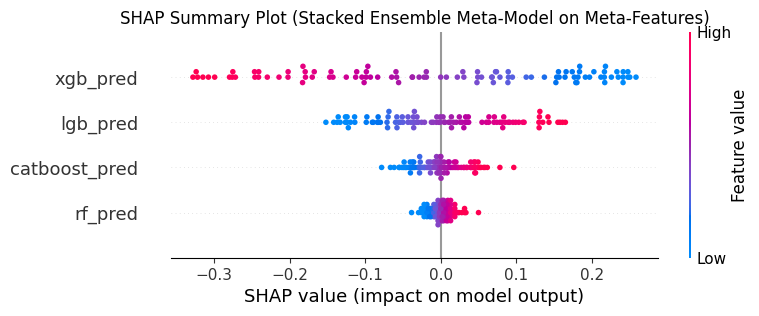

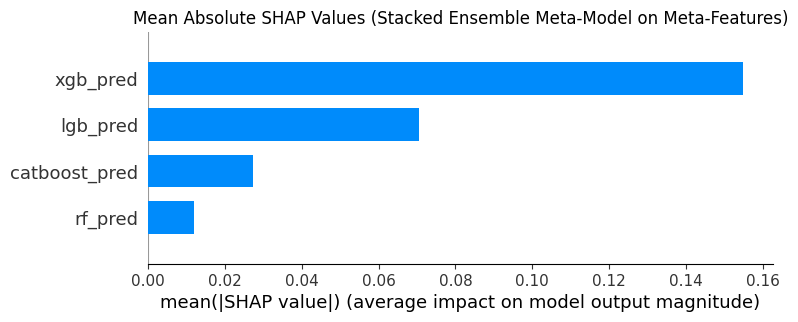

SHAP values for the stacked ensemble's meta-model have been visualized.

Calculating SHAP values for Voting Ensemble...


  0%|          | 0/100 [00:00<?, ?it/s]

Error during SHAP calculation or plotting for Voting Ensemble: The shape of the shap_values matrix does not match the shape of the provided data matrix.


In [ ]:
#  to visualize

import pandas as pd
import matplotlib.pyplot as plt
# Use the ensemble model (e.g., StackingClassifier) to visualize SHAP
# We need to train the ensemble model on the entire training data first for SHAP.
# We will use the stacked_model for SHAP visualization if it was successfully trained.

if y is not None and 'stacked_model' in locals() and len(X_test) > 0:
  print("\nCalculating SHAP values for Stacked Ensemble...")
  try:
    # SHAP can be tricky with complex ensembles like Stacking.
    # A common approach is to explain the final_estimator (meta-model)
    # based on the predictions of the base models (the meta-features).
    # However, this explains the meta-model's logic, not the original features' impact.

    # To explain the impact of original features using a stacking model,
    # you might need a different SHAP explainer or approach.
    # TreeExplainer works well for tree-based models like CatBoost, LightGBM, XGBoost, RF.
    # For a stacking model, we could try explaining the final estimator (Logistic Regression)
    # but we would need the predictions of the base models on the dataset we want to explain (X_test).

    # Let's calculate the meta-features for X_test using the trained base models again.
    if 'catboost_model' in locals() and 'lgb_model' in locals() and 'xgb_model' in locals() and 'rf_model' in locals():
        meta_features_test_for_shap = pd.DataFrame({
            'catboost_pred': catboost_model.predict_proba(X_test)[:, 1],
            'lgb_pred': lgb_model.predict_proba(X_test)[:, 1],
            'xgb_pred': xgb_model.predict_proba(X_test)[:, 1],
            'rf_pred': rf_model.predict_proba(X_test)[:, 1]
        })

        # Explain the meta-model (Logistic Regression) based on the meta-features
        explainer_meta = shap.LinearExplainer(stacked_model.final_estimator_, meta_features_test_for_shap)
        shap_values_meta = explainer_meta.shap_values(meta_features_test_for_shap)

        # Plot summary plot of SHAP values for the meta-model (explaining meta-features)
        # For LinearExplainer with a binary target, shap_values is usually a single array.
        shap.summary_plot(shap_values_meta, meta_features_test_for_shap, show=False)
        plt.title("SHAP Summary Plot (Stacked Ensemble Meta-Model on Meta-Features)")
        plt.show()

        # Plot bar plot of mean absolute SHAP values for the meta-model
        shap.summary_plot(shap_values_meta, meta_features_test_for_shap, plot_type="bar", show=False)
        plt.title("Mean Absolute SHAP Values (Stacked Ensemble Meta-Model on Meta-Features)")
        plt.show()

        print("SHAP values for the stacked ensemble's meta-model have been visualized.")

    else:
        print("Skipping SHAP for Stacked Ensemble meta-model: Base models not found.")


  except Exception as e:
    print(f"Error during SHAP calculation or plotting for Stacked Ensemble: {e}")
else:
  print("\nSkipping SHAP for Stacked Ensemble: Target variable not found, stacked model not trained, or test set is empty.")

# Alternatively, to understand the contribution of *original* features
# to the stacking model's output, you might need to consider techniques
# that integrate SHAP with ensemble methods or use KernelExplainer
# which is model-agnostic but computationally more expensive.

# Example of using KernelExplainer (may take a significant amount of time)
# print("\nCalculating SHAP values for Stacked Ensemble using KernelExplainer (may take time)...")
# if y is not None and 'stacked_model' in locals() and len(X_test) > 0:
#     try:
#         # Using a small subset of the test data for KernelExplainer for demonstration
#         # For better accuracy, use a larger background dataset (e.g., a sample of the training data)
#         X_test_subset = X_test.sample(n=100, random_state=42) # Adjust subset size as needed

#         # KernelExplainer requires a background dataset. Use a sample of the training data.
#         # For large datasets, a small sample (e.g., 100-1000 samples) is often sufficient.
#         background_data = X_train.sample(n=200, random_state=42) # Adjust sample size

#         explainer_kernel = shap.KernelExplainer(stacked_model.predict_proba, background_data)
#         # Note: For multi-output models like predict_proba returning values for both classes,
#         # KernelExplainer returns shap_values for each output.
#         # We typically focus on the SHAP values for the positive class (index 1).
#         shap_values_kernel = explainer_kernel.shap_values(X_test_subset)[1]

#         # Plot summary plot of SHAP values for the stacked ensemble on original features
#         shap.summary_plot(shap_values_kernel, X_test_subset, show=False)
#         plt.title("SHAP Summary Plot (Stacked Ensemble on Original Features - KernelExplainer)")
#         plt.show()

#         # Plot bar plot of mean absolute SHAP values
#         shap.summary_plot(shap_values_kernel, X_test_subset, plot_type="bar", show=False)
#         plt.title("Mean Absolute SHAP Values (Stacked Ensemble on Original Features - KernelExplainer)")
#         plt.show()

#     except Exception as e:
#         print(f"Error during KernelExplainer SHAP calculation or plotting: {e}")
# else:
#     print("\nSkipping KernelExplainer SHAP for Stacked Ensemble.")

# You can repeat this process for the Voting Ensemble (if trained)
if y is not None and 'voter' in locals() and len(X_test) > 0:
    print("\nCalculating SHAP values for Voting Ensemble...")
    try:
        # For VotingClassifier, TreeExplainer might not work directly.
        # KernelExplainer is a more general option.
        # Using a small subset of the test data for KernelExplainer for demonstration
        # For better accuracy, use a larger background dataset.
        X_test_subset_v = X_test.sample(n=min(100, len(X_test)), random_state=42) # Adjust subset size as needed
        background_data_v = X_train.sample(n=200, random_state=42) # Adjust sample size

        explainer_voter = shap.KernelExplainer(voter.predict_proba, background_data_v)
        shap_values_voter = explainer_voter.shap_values(X_test_subset_v)[1] # Get SHAP for positive class

        # Plot summary plot of SHAP values
        shap.summary_plot(shap_values_voter, X_test_subset_v, show=False)
        plt.title("SHAP Summary Plot (Voting Ensemble - KernelExplainer)")
        plt.show()

        # Plot bar plot of mean absolute SHAP values
        shap.summary_plot(shap_values_voter, X_test_subset_v, plot_type="bar", show=False)
        plt.title("Mean Absolute SHAP Values (Voting Ensemble - KernelExplainer)")
        plt.show()

    except Exception as e:
        print(f"Error during SHAP calculation or plotting for Voting Ensemble: {e}")
else:
    print("\nSkipping SHAP for Voting Ensemble: Target variable not found, voting model not trained, or test set is empty.")

In [ ]:
.